_todo: Read in data._

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

data = pd.read_csv('blueprinty.csv')

data.head()

,Unnamed: 0,patents,region,age,iscustomer
0,1,0,Midwest,32.5,0
1,786,3,Southwest,37.5,0
2,348,4,Northwest,27.0,1
3,927,3,Northeast,24.5,0
4,830,3,Southwest,37.0,0


_todo: Compare histograms and means of number of patents by customer status. What do you observe?_


In [25]:
# count number of customers and non-customers

data[data['iscustomer']==1]['iscustomer'].count()


197

In [24]:
data[data['iscustomer']==0]['iscustomer'].count()

1303

Text(0.5, 1.0, 'Frequency of Patents for Customers')

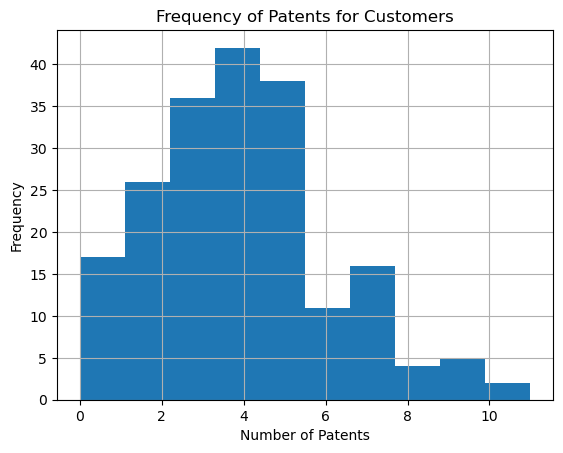

In [10]:
# make histogram of # of patents for Customers


data[data['iscustomer'] == 1]['patents'].hist()

plt.xlabel('Number of Patents')
plt.ylabel('Frequency')
plt.title('Frequency of Patents for Customers')


Text(0.5, 1.0, 'Frequency of Patents for Non-Customers')

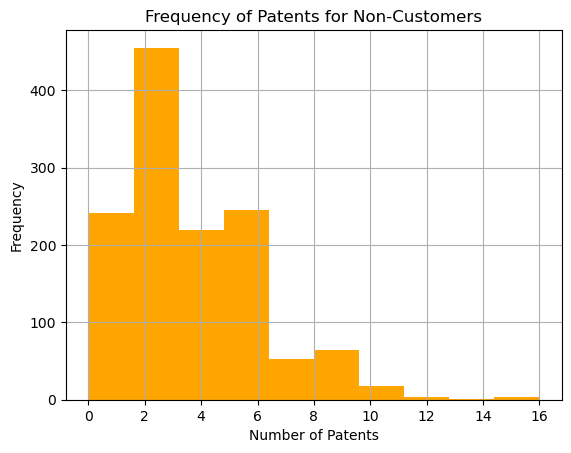

In [14]:
# make histogram of # of patents for Non-Customers

data[data['iscustomer'] == 0]['patents'].hist(color='orange')
plt.xlabel('Number of Patents')
plt.ylabel('Frequency')
plt.title('Frequency of Patents for Non-Customers')



The number of patents for customers is slightly skewed right, however it has a more normal distribution than the number of patents for non-customers.

Both plots have a large drop off around 6 patents (For customers it is slightly less than 6). The number of non-customers is significantly higher than the number of customers, totaling to 1303 non-customers and 197 customers. The mean number of patents for customers was 4.09 and the mean number of patents for non-customers was 3.62. This is a difference of about 0.5 patents.

In [16]:
mean_patents_customers = data[data['iscustomer'] == 1]['patents'].mean()
mean_patents_noncustomers = data[data['iscustomer'] == 0]['patents'].mean()

print('Mean patents for customers:', round(mean_patents_customers,2))
print('Mean patents for non-customers:', round(mean_patents_noncustomers,2))

Mean patents for customers: 4.09
Mean patents for non-customers: 3.62


_todo: Compare regions and ages by customer status. What do you observe?_

In [28]:
# group by region and count number of customers and non-customers

data.groupby('region')['iscustomer'].value_counts()



region     iscustomer
Midwest    0             207
           1              17
Northeast  0             488
           1             113
Northwest  0             171
           1              16
South      0             171
           1              20
Southwest  0             266
           1              31
Name: count, dtype: int64

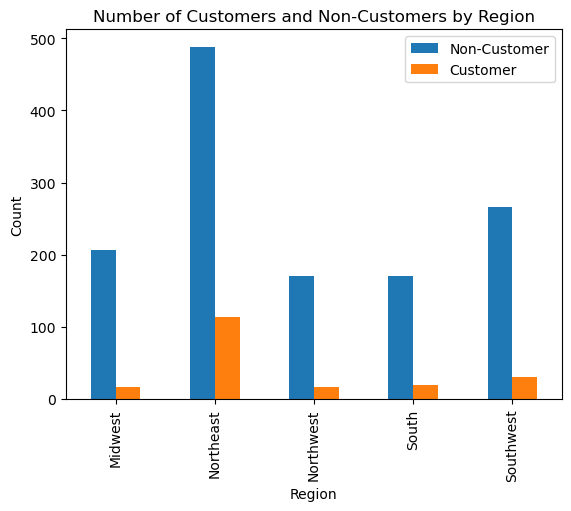

In [33]:
# create a plot of the number of customers and non-customers by region side by side

data.groupby('region')['iscustomer'].value_counts().unstack().plot(kind='bar', stacked=False)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Customers and Non-Customers by Region')
plt.legend(['Non-Customer', 'Customer'])

/tmp/ipykernel_17195/1084354228.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_bins')['iscustomer'].value_counts().unstack().plot(kind='bar', stacked=False)


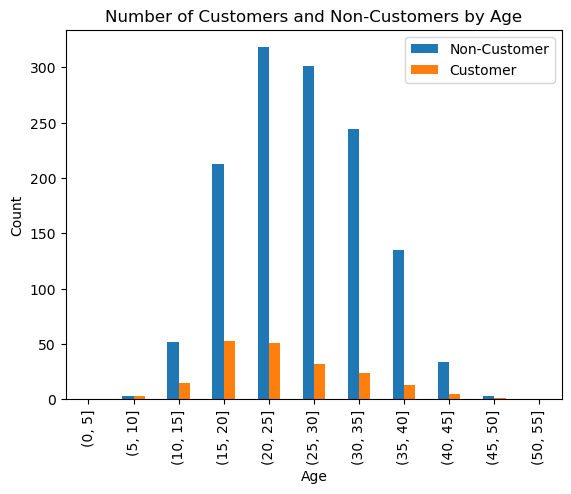

In [43]:
# group by age with bins every 5 years and count number of customers and non-customers

data['age_bins'] = pd.cut(data['age'], bins=range(0, 60, 5))

data.groupby('age_bins')['iscustomer'].value_counts().unstack().plot(kind='bar', stacked=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Customers and Non-Customers by Age')
plt.legend(['Non-Customer', 'Customer'])